    Homework 09: Clustering (HClustering and K-means)
    AMRUTHA KANAKATTE RAVISHANKAR
    CWID :20027346

In [42]:
#Import the required libraries
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [43]:
# Load the dataset
df = pd.read_csv('wisc_bc_ContinuousVar.csv')
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [44]:
#Handling the missing values
df = df.dropna() 
print(df[df.isna().any(axis=1)]) 

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 32 columns]


In [45]:
# Assign the features and targets 
target = df['diagnosis']  
features = df.drop(columns=['diagnosis'])

In [46]:
# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

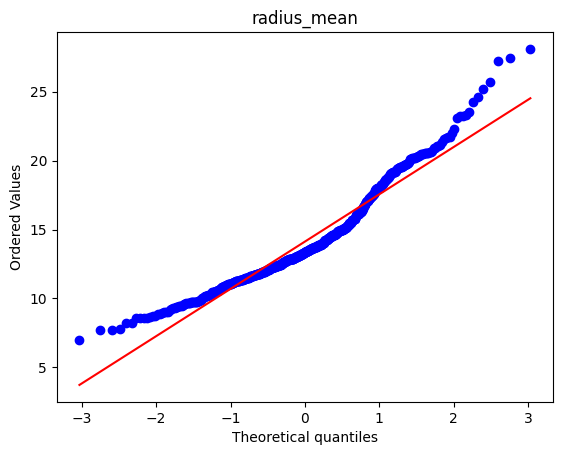

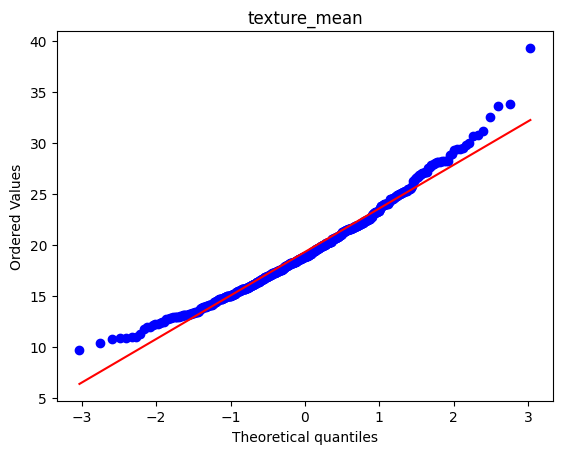

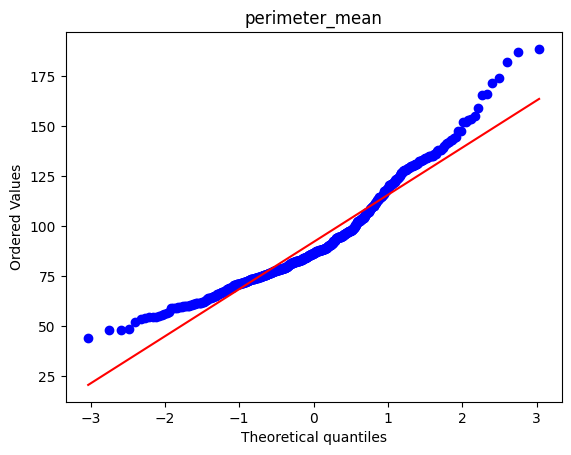

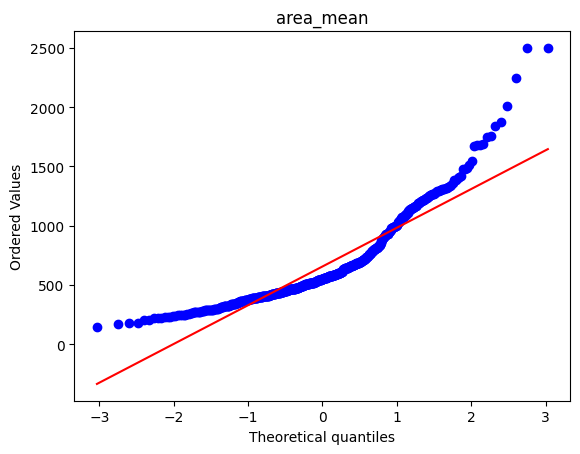

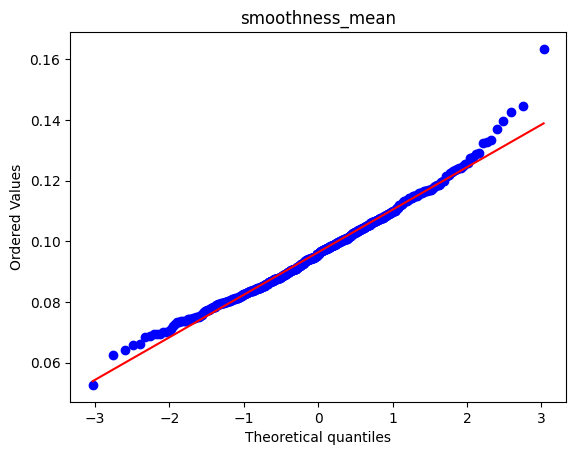

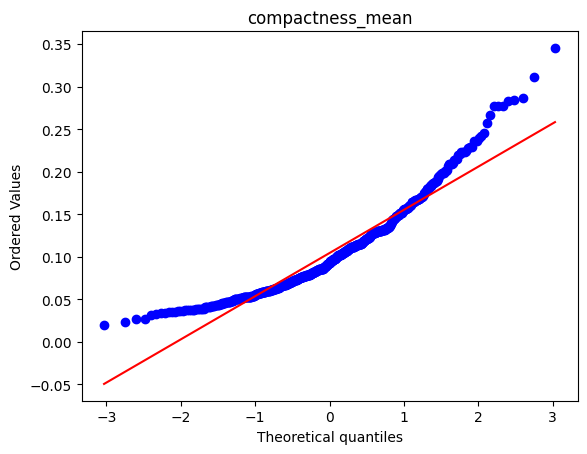

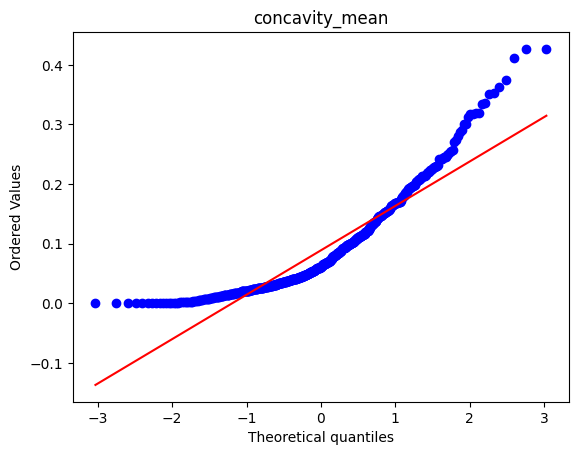

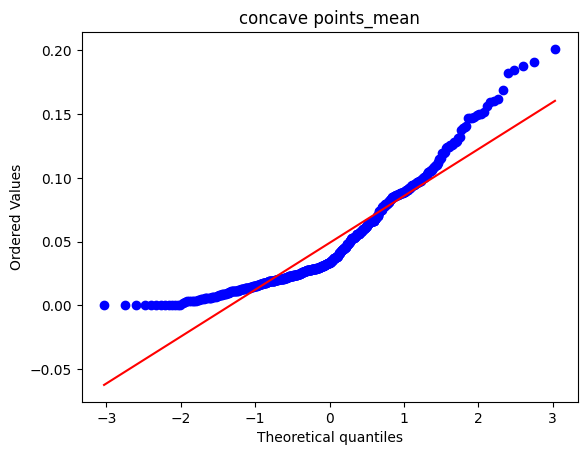

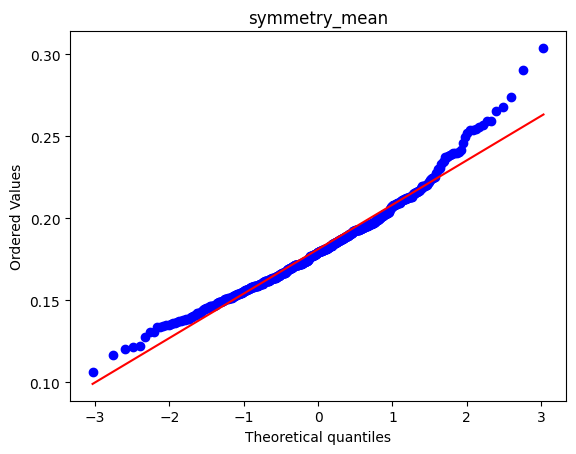

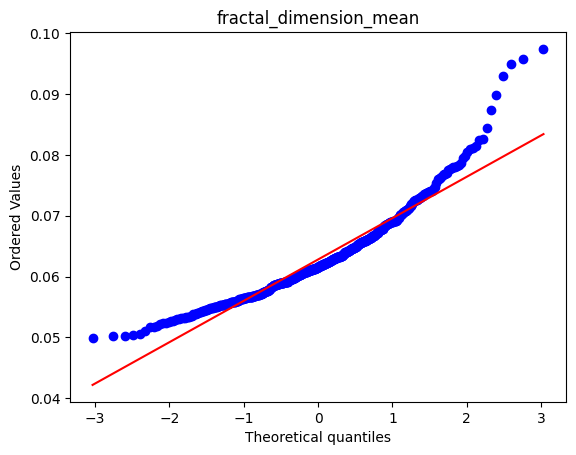

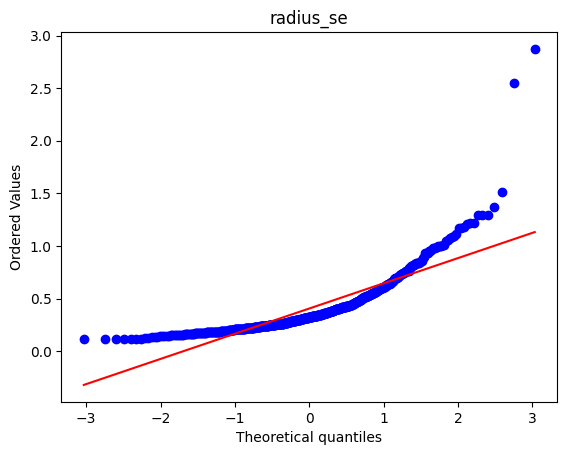

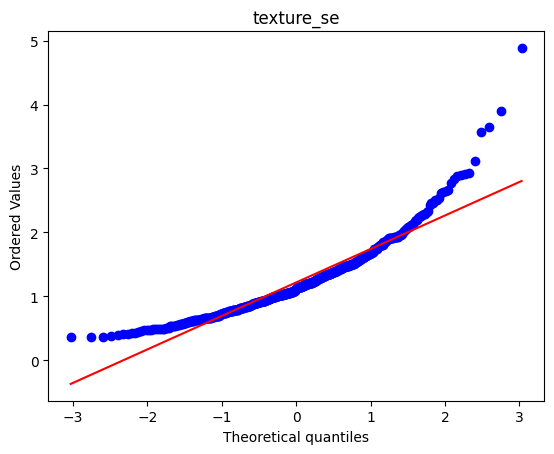

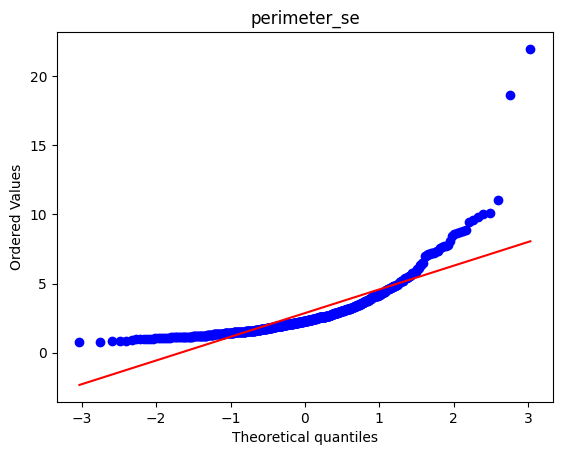

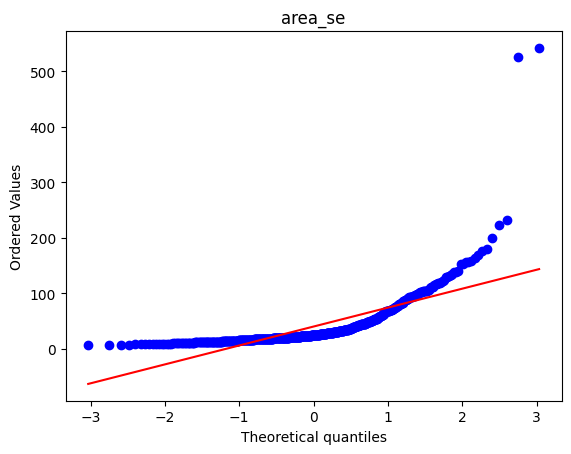

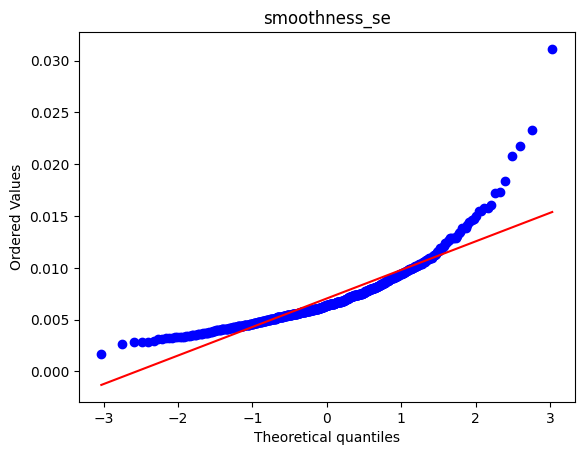

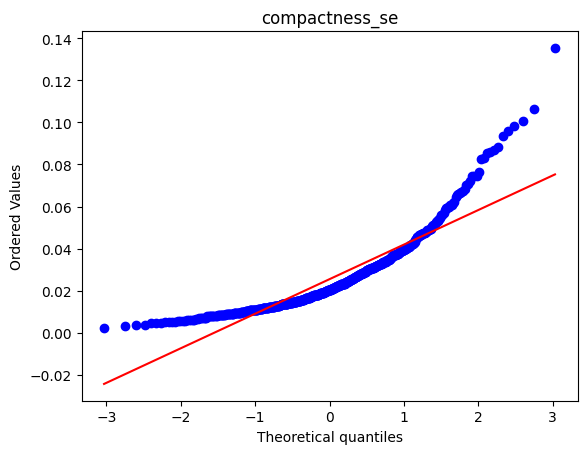

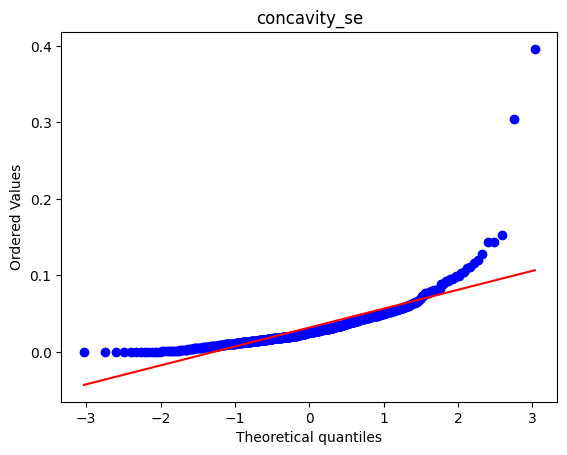

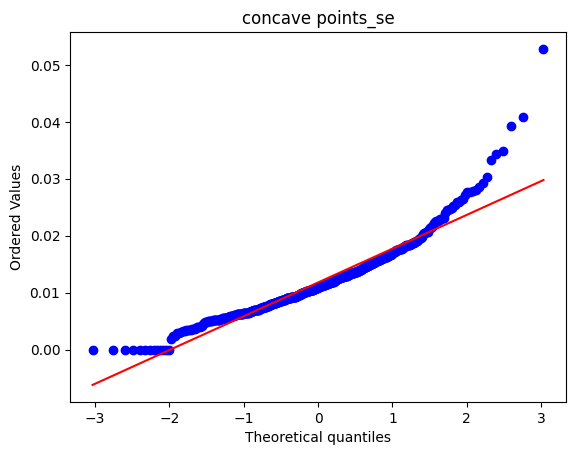

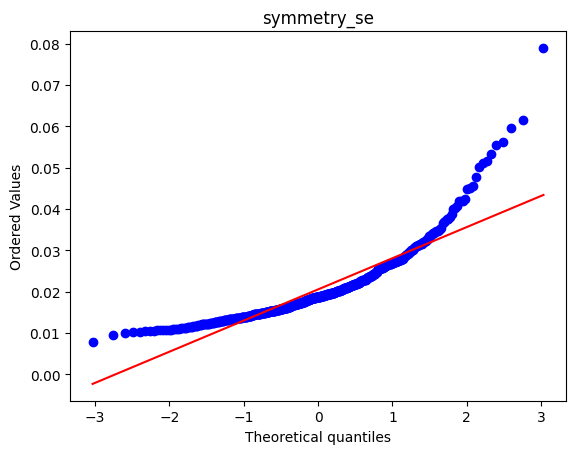

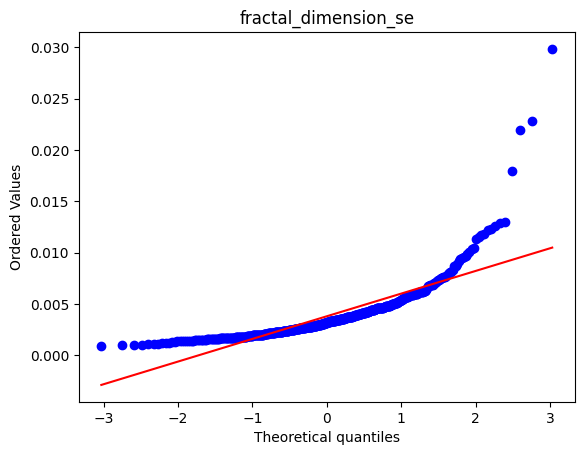

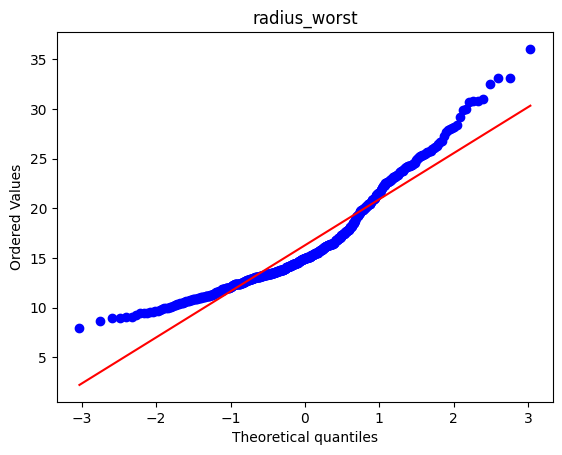

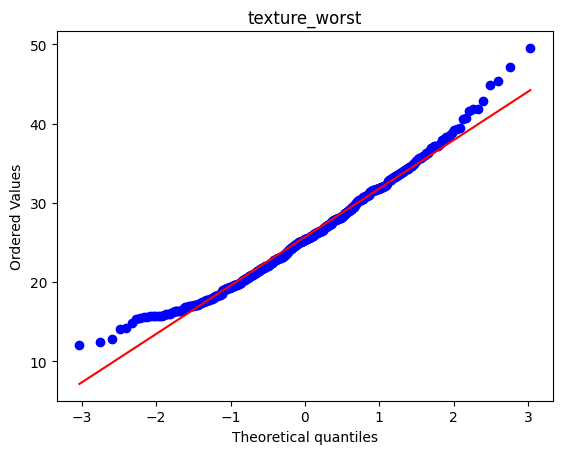

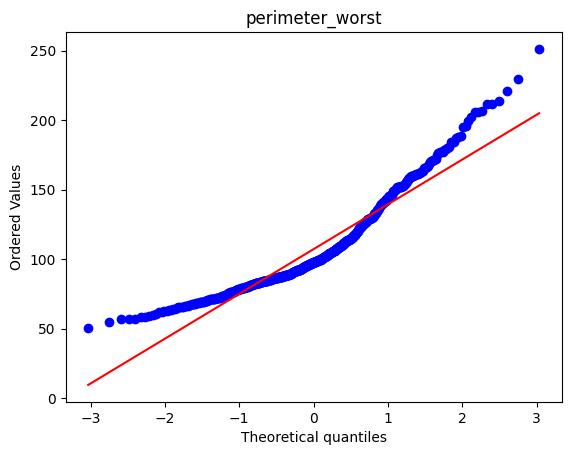

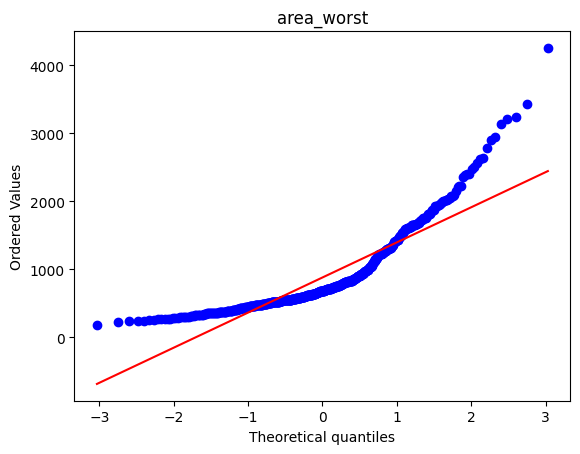

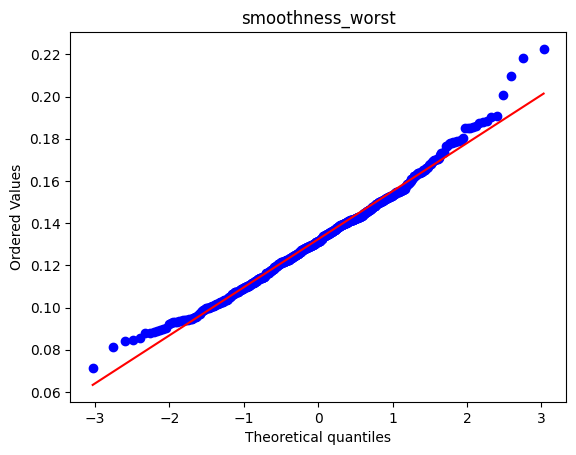

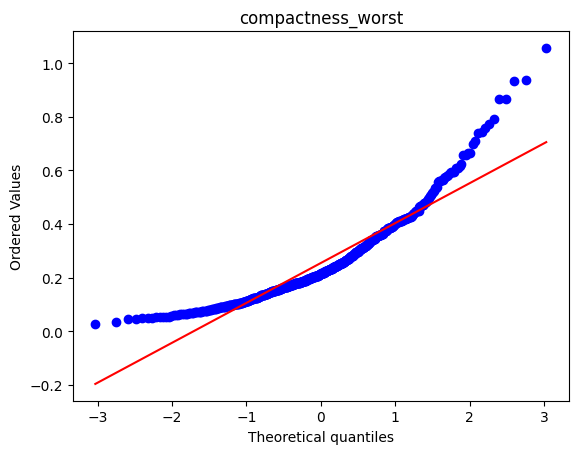

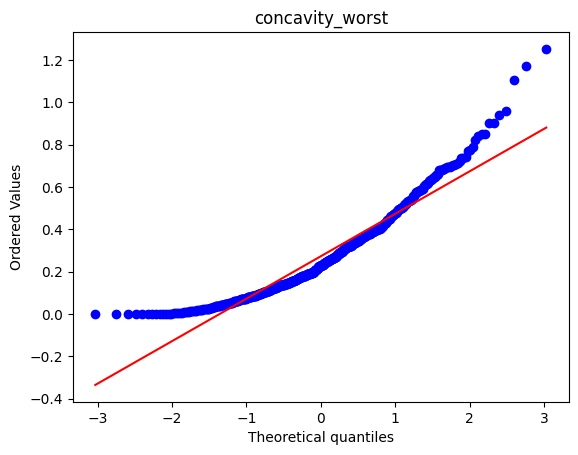

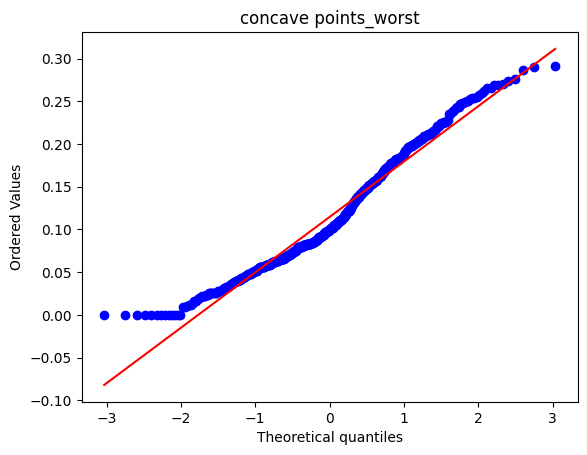

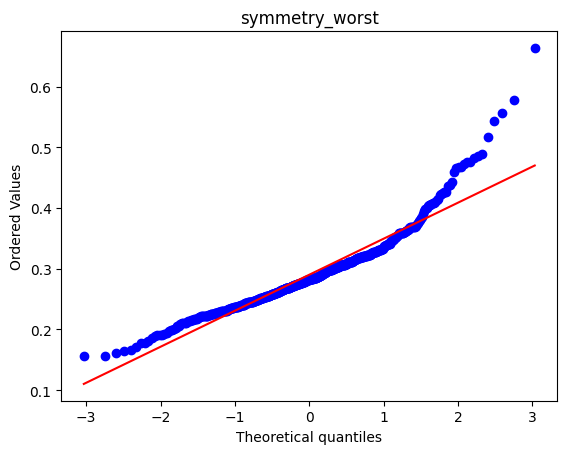

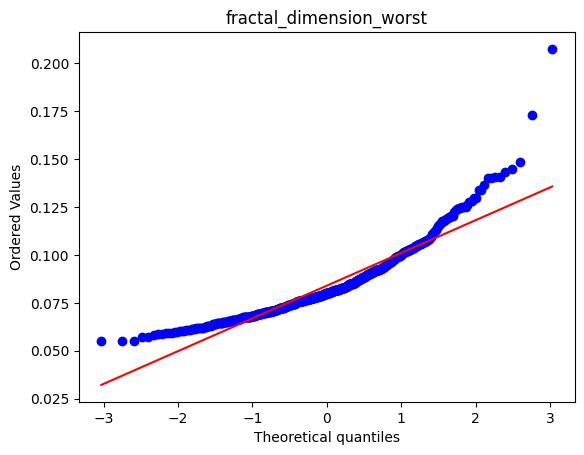

In [47]:
# List of numeric columns 
columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Plots Q-Q  for each numeric column
for col in columns:
    stats.probplot(df[col], dist="norm", plot=pylab)
    pylab.title(col)
    pylab.show()


9.1. HCluster

In [48]:
#Performing the clustering
groups = AgglomerativeClustering(n_clusters=2 , metric='euclidean',linkage='average')
clusters=groups.fit_predict(features_scaled)

In [49]:
#Cross Tabulation
df_cluster=pd.DataFrame({'Actual':target,'Cluster':clusters})
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])
print(cross_tab)

Cluster    0  1
Actual         
B        357  0
M        209  3


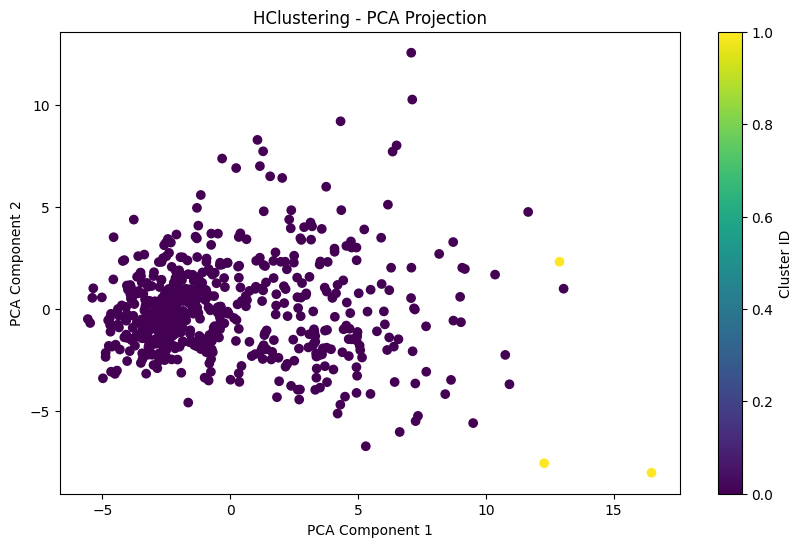

In [50]:
# PCA to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', label='Clusters')
plt.title('HClustering - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster ID')
plt.show()

9.2. K means

In [51]:
#Performing the k-means clustering
num_clusters = 2  
kmeans = KMeans(n_clusters=num_clusters, random_state=12)
kmeans.fit(features)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [52]:
# Cross-tabulation
df_cluster=pd.DataFrame({'Actual':target,'Cluster':labels})
cross_tab = pd.crosstab(df_cluster['Actual'], df_cluster['Cluster'])
print(cross_tab)

Cluster    0  1
Actual         
B        351  6
M        207  5


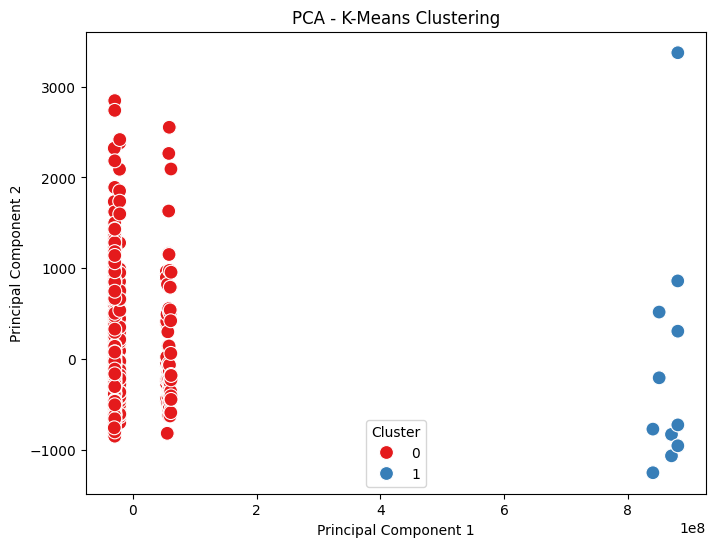

In [53]:
# Performing PCA for 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

df_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100, marker='o')
plt.title('PCA - K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()